<img style="float: left; margin: 30px 15px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFzQj91sOlkeDFkg5HDbjtR4QJYmLXkfMNig&usqp=CAU" width="400" height="500" />
    
    
### <font color='navy'> Modelos no lineales para pronósticos.

**Nombres:**
- Judith Alejandra Hinojosa Rábago
- Ricardo Damián Hernández Ramírez

**Fecha:** 6 de febrero del 2024

**Expediente** :
- 737456
- 740356
    
**Profesor:** Oscar David Jaramillo Zuluaga.
    
**Link Github**: [https://github.com/judith-ale/ProyectoConjunto_JAHinojosa_RDHernandez](https://github.com/judith-ale/ProyectoConjunto_JAHinojosa_RDHernandez)

# Tarea 2: Clase 4

## Enunciado de tarea

Para ejemplo estudiado en esta clase data WWWUsage.csv probar lo siguiente:
1. Encontrar el mejor modelo ARIMA usando los criterios de AIC, BIC y log-verosimilud, justificando la estructura propuesta.
2. Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo precedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los análisis realizados, incluyendo los resultados de las gráficas de ACF y PAC.
3. Investigar la implementación y teoría de los modelos SARIMAX. Además de eso, generar un modelo de pronóstico usando SARIMAX, donde todo el procediemiento anteriormente descrito es implementado, para el siguiente conjunto de datos con estacionalidad:
```
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))
data2.index = pd.date_range(start=datetime(data2.time[0], 1, 1), periods=len(data2), freq='MS')
```
**Nota**: Pueden basarse en el siguiente enlace para entender el análisis a realizar 
https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

4. Realizar una predicción de 20 unidades de tiempo en el futuro, tanto para el modelo ARIMA como SARIMA y reportar los resulados en una gráfica donde se puedan observar los datos reales y los datos predichos, cómo en la siguiente gráfica:
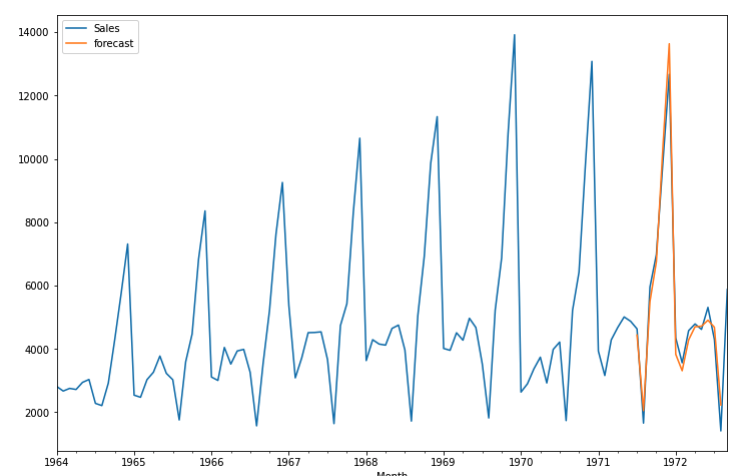

### Ejercicio 1: Encontrar el mejor modelo ARIMA usando los criterios de AIC, BIC y log-verosimilud, justificando la estructura propuesta.

#### Estudiante 1: Judith Alejandra Hinojosa Rábago

##### Librerías e importación de datos

In [1]:
# Librerías
from scipy.stats import norm
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from io import BytesIO
import pandas as pd

# Ignorar warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Cargar los datos
data = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/WWWusage.csv', names=[ 'values'], header=0)
data.index = data.index.droplevel()
data.head()

,values
1,88
2,84
3,85
4,85
5,84


In [3]:
# División de los datos en en...
train = data.iloc[:80] # entrenamiento (80%)
test = data.iloc[80:] # prueba (20%)

##### Análisis de datos para escoger parámetros de ARIMA

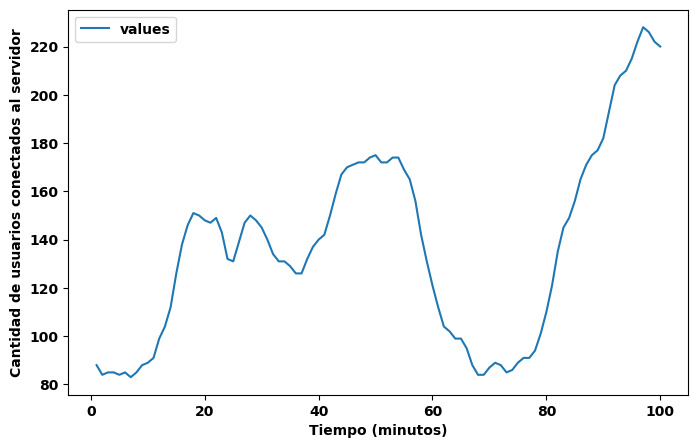

In [4]:
# Visualización de la serie de tiempo
data.plot(figsize=(8,5))
plt.xlabel('Tiempo (minutos)')
plt.ylabel('Cantidad de usuarios conectados al servidor')
plt.show()

In [5]:
# Función para graficar ACF y PACF realizada en la clase
def plot_acf_pacf(data, kwargs=dict()):
    f = plt.figure(figsize=(8,5))

    ax1 = f.add_subplot(121)

    plot_acf(data, zero=False, ax=ax1, **kwargs)

    ax2 = f.add_subplot(122)
    plot_pacf(data, zero=False, ax=ax2, method='ols', **kwargs)

    plt.show()

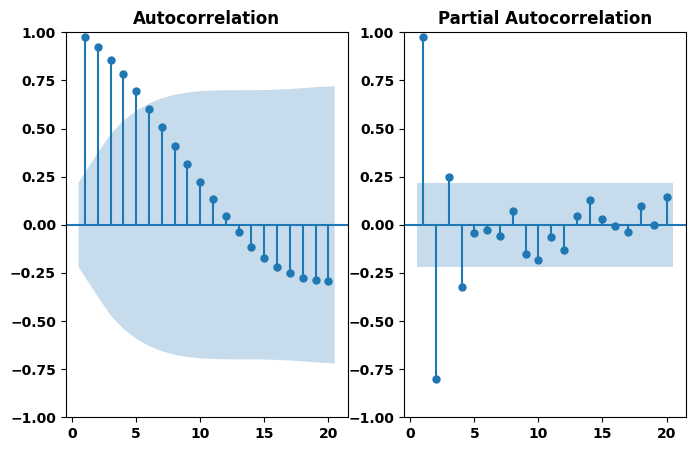

In [6]:
# Graficar ACF y PACF del dataset train
plot_acf_pacf(train, {'lags': 20})

In [7]:
# Función de prueba ADF realizada en la clase
def adf_test(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag="AIC")
    dfoutput = pd.Series(
        dftest[0:4],
        index=[
            "Test Statistic",
            "p-value",
            "#Lags Used",
            "Number of Observations Used",
        ],
    )
    for key, value in dftest[4].items():
        dfoutput["Critical Value (%s)" % key] = value
    print(dfoutput)
    
    if (dftest[1] <= 0.05) & (dftest[4]['5%'] > dftest[0]):
        print("\u001b[32mStationary\u001b[0m")
    else:
        print("\x1b[31mNon-stationary\x1b[0m")

In [8]:
# Probar estacionariedad en train
adf_test(train)

Results of Dickey-Fuller Test:
Test Statistic                 -2.649346
p-value                         0.083221
#Lags Used                      3.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64
Non-stationary


In [9]:
# Diferenciación de la serie train
diff1_values = train.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values) # Probar estacionariedad

diff2_values = train.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values) # Probar estacionariedad

ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.504537
p-value                         0.114374
#Lags Used                      2.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64
Non-stationary
ADF para derivada segundo orden...

Results of Dickey-Fuller Test:
Test Statistic                -8.236551e+00
p-value                        5.869012e-13
#Lags Used                     1.000000e+00
Number of Observations Used    7.600000e+01
Critical Value (1%)           -3.519481e+00
Critical Value (5%)           -2.900395e+00
Critical Value (10%)          -2.587498e+00
dtype: float64
Stationary


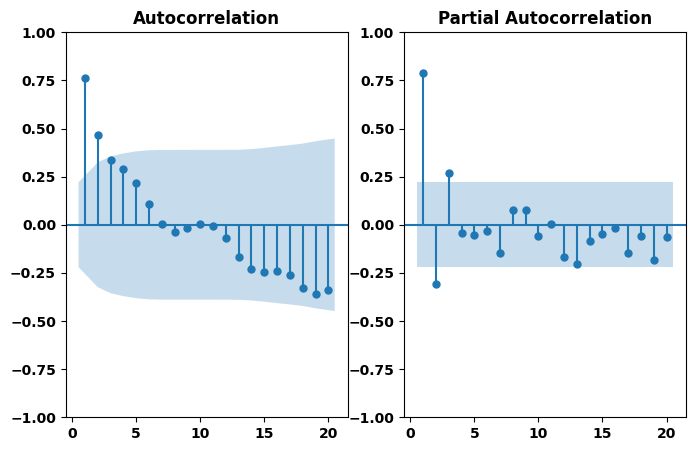

In [10]:
# Graficar ACF y PACF del dataset con una diferenciación
plot_acf_pacf(diff1_values, {'lags': 20})

Los posibles valores para una diferenciación son:
- $p=3$ 
- $d=1$
- $q=2$

o

- $p=3$ 
- $d=1$
- $q=0$

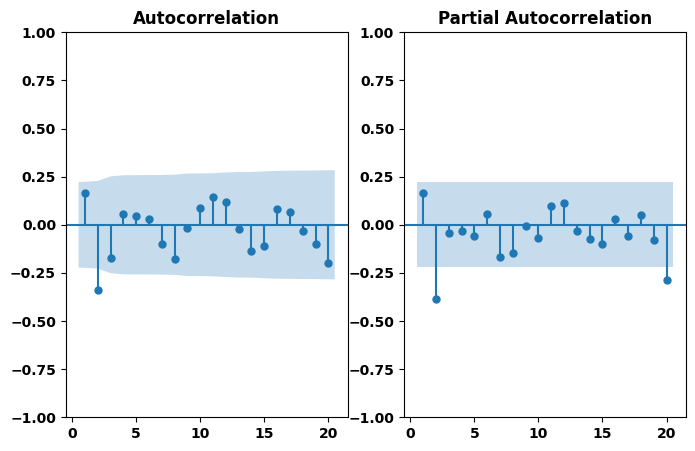

In [11]:
# Graficar ACF y PACF del dataset con dos diferenciaciones
plot_acf_pacf(diff2_values, {'lags': 20})

Los posibles valores para dos diferenciaciones son:
- $p=2$ 
- $d=2$
- $q=2$

In [12]:
# 1. Modelo de diferencia de primer orden (p=3, d=1, q=2)
arima_model1 = ARIMA(train, order=(3, 1, 2))
model1 = arima_model1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:                 ARIMA(3, 1, 2)   Log Likelihood                -201.589
Date:                Tue, 06 Feb 2024   AIC                            415.178
Time:                        00:37:31   BIC                            429.394
Sample:                             0   HQIC                           420.873
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1445      0.227     -0.636      0.525      -0.590       0.301
ar.L2          0.1469      0.227      0.648      0.517      -0.297       0.591
ar.L3          0.3064      0.189      1.621      0.1

In [13]:
# 2. Modelo de diferencia de primer orden (p=3, d=1, q=0)
arima_model2 = ARIMA(train, order=(3, 1, 0))
model2 = arima_model2.fit()
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -202.280
Date:                Tue, 06 Feb 2024   AIC                            412.560
Time:                        00:37:31   BIC                            422.038
Sample:                             0   HQIC                           416.357
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1057      0.110     10.037      0.000       0.890       1.322
ar.L2         -0.5786      0.140     -4.141      0.000      -0.852      -0.305
ar.L3          0.2645      0.107      2.470      0.0

In [14]:
# 3. Modelo de diferencia de segundo orden (p=2, d=2, q=2)
arima_model3 = ARIMA(train, order=((0, 1), 2, (0, 1)))
model3 = arima_model3.fit()
print(model3.summary())

                               SARIMAX Results                                
Dep. Variable:                 values   No. Observations:                   80
Model:             ARIMA([2], 2, [2])   Log Likelihood                -204.918
Date:                Tue, 06 Feb 2024   AIC                            415.836
Time:                        00:37:31   BIC                            422.906
Sample:                             0   HQIC                           418.666
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2         -0.1580      0.299     -0.528      0.598      -0.744       0.428
ma.L2         -0.2139      0.299     -0.716      0.474      -0.799       0.372
sigma2        11.1660      2.019      5.531      0.0

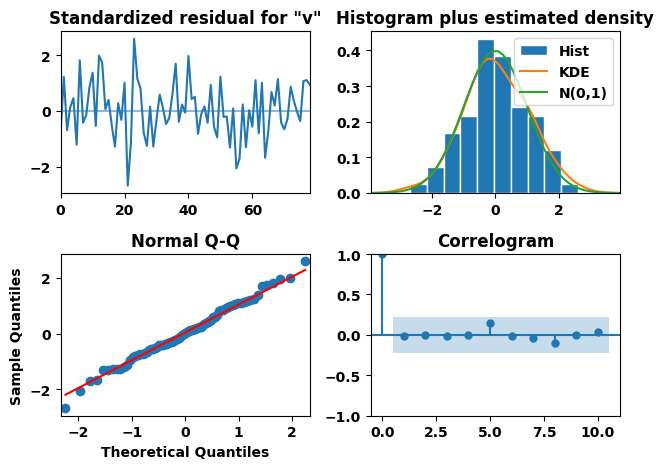

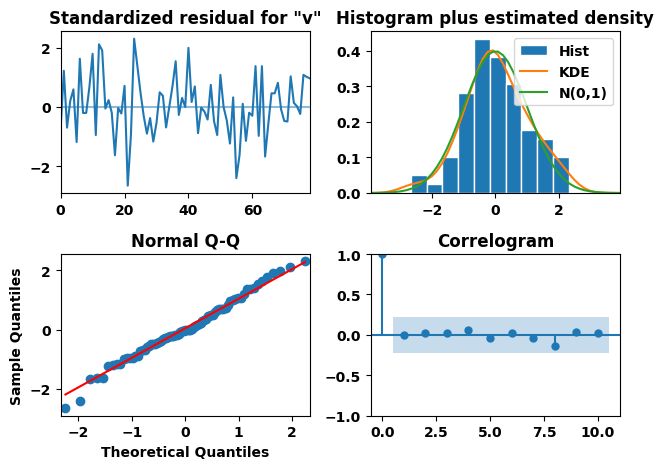

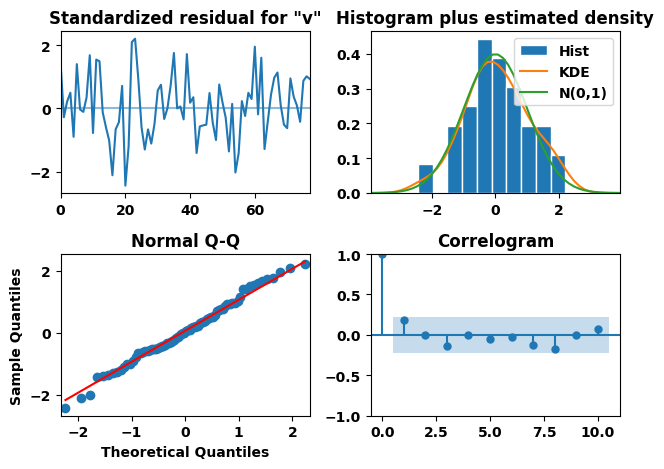

In [15]:
# Gráfico de los diagnósticos para los residuos
model1.plot_diagnostics()
plt.tight_layout()
model2.plot_diagnostics()
plt.tight_layout()
model3.plot_diagnostics()
plt.tight_layout()

<Axes: >

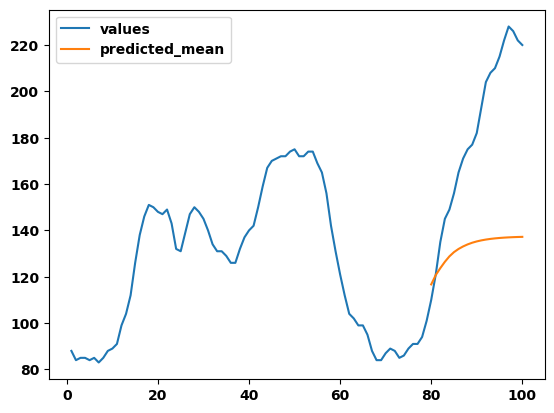

In [16]:
y_h = model2.predict(start=80, end=100, dynamic=False).to_frame()

ax = data.plot()

y_h.plot(ax=ax)

#### Estudiante 2: Ricardo Damián Hernández Ramírez

### Respuesta planteada en el ejercicio 1 usando (markdown)

La respuesta es un modelo ARIMA con parámetros:

- $p=3$
- $d=1$
- $q=0$

### Ejercicio 2: Analizar el efecto de normalizar la serie de tiempo, es decir usar MinMaxScaler para normalizar los datos. Posterior a esto, realizar el mismo precedimiento realizado en clase y encontrar el mejor modelo de ARIMA. Justifique todos los análisis realizados, incluyendo los resultados de las gráficas de ACF y PAC.

#### Estudiante 1: Judith Alejandra Hinojosa Rábago

In [17]:
# Normalización
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_minmax = pd.DataFrame(scaler.fit_transform(train))

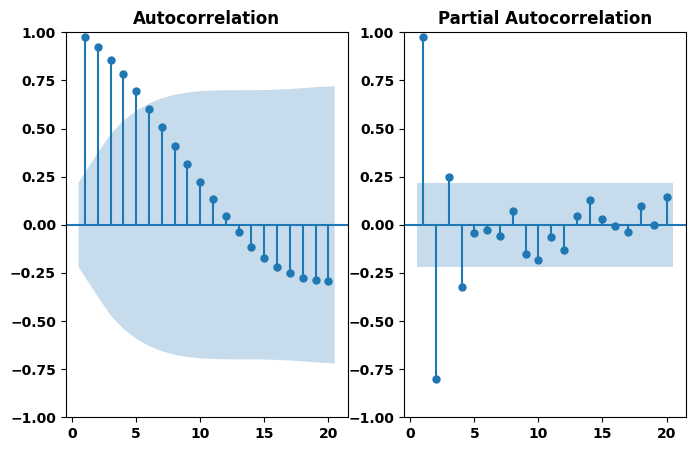

In [18]:
# Graficar ACF y PACF del dataset train
plot_acf_pacf(train_minmax, {'lags': 20})

In [19]:
# Probar estacionariedad en train
adf_test(train_minmax)

Results of Dickey-Fuller Test:
Test Statistic                 -2.649346
p-value                         0.083221
#Lags Used                      3.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64
Non-stationary


In [20]:
# Diferenciación de la serie train
diff1_values = train_minmax.diff().dropna()

print('ADF para derivada primer orden...\n')
adf_test(diff1_values) # Probar estacionariedad

diff2_values = train_minmax.diff().diff().dropna()

print('ADF para derivada segundo orden...\n')
adf_test(diff2_values) # Probar estacionariedad

ADF para derivada primer orden...

Results of Dickey-Fuller Test:
Test Statistic                 -2.504537
p-value                         0.114374
#Lags Used                      2.000000
Number of Observations Used    76.000000
Critical Value (1%)            -3.519481
Critical Value (5%)            -2.900395
Critical Value (10%)           -2.587498
dtype: float64
Non-stationary
ADF para derivada segundo orden...

Results of Dickey-Fuller Test:
Test Statistic                -8.236551e+00
p-value                        5.869012e-13
#Lags Used                     1.000000e+00
Number of Observations Used    7.600000e+01
Critical Value (1%)           -3.519481e+00
Critical Value (5%)           -2.900395e+00
Critical Value (10%)          -2.587498e+00
dtype: float64
Stationary


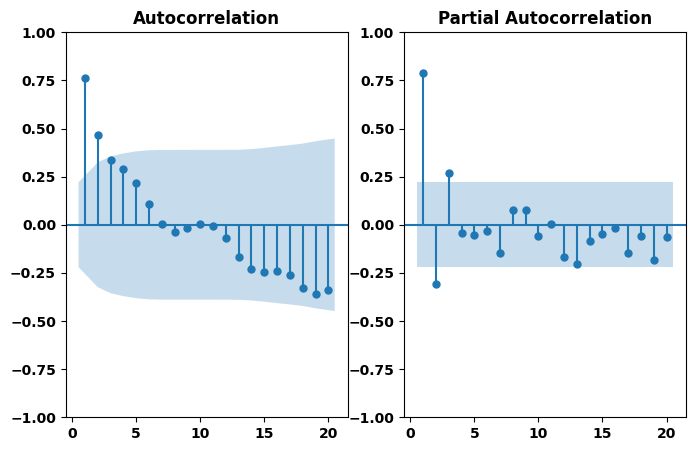

In [21]:
# Graficar ACF y PACF del dataset con una diferenciación
plot_acf_pacf(diff1_values, {'lags': 20})

Los posibles valores para una diferenciación son:
- $p=3$ 
- $d=1$
- $q=2$

o

- $p=3$ 
- $d=1$
- $q=0$

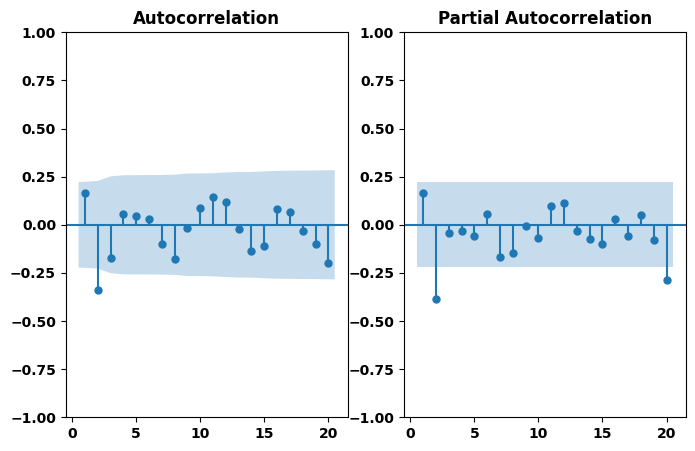

In [22]:
# Graficar ACF y PACF del dataset con dos diferenciaciones
plot_acf_pacf(diff2_values, {'lags': 20})

Los posibles valores para dos diferenciaciones son:
- $p=2$ 
- $d=2$
- $q=2$

In [23]:
# 1. Modelo de diferencia de primer orden (p=3, d=1, q=2)
arima_model1 = ARIMA(train_minmax, order=(3, 1, 2))
model1 = arima_model1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   80
Model:                 ARIMA(3, 1, 2)   Log Likelihood                 155.512
Date:                Tue, 06 Feb 2024   AIC                           -299.024
Time:                        00:37:36   BIC                           -284.808
Sample:                             0   HQIC                          -293.329
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0903      0.300     -0.301      0.763      -0.678       0.497
ar.L2          0.1457      0.280      0.521      0.603      -0.403       0.694
ar.L3          0.2279      0.227      1.004      0.3

In [24]:
# 2. Modelo de diferencia de primer orden (p=3, d=1, q=0)
arima_model2 = ARIMA(train_minmax, order=(3, 1, 0))
model2 = arima_model2.fit()
print(model2.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   80
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 154.942
Date:                Tue, 06 Feb 2024   AIC                           -301.883
Time:                        00:37:36   BIC                           -292.405
Sample:                             0   HQIC                          -298.086
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.1051      0.110     10.046      0.000       0.890       1.321
ar.L2         -0.5765      0.140     -4.130      0.000      -0.850      -0.303
ar.L3          0.2627      0.107      2.452      0.0

In [25]:
# 3. Modelo de diferencia de segundo orden (p=2, d=2, q=2)
arima_model3 = ARIMA(train_minmax, order=((0, 1), 2, (0, 1)))
model3 = arima_model3.fit()
print(model3.summary())

                               SARIMAX Results                                
Dep. Variable:                      0   No. Observations:                   80
Model:             ARIMA([2], 2, [2])   Log Likelihood                 147.782
Date:                Tue, 06 Feb 2024   AIC                           -289.563
Time:                        00:37:36   BIC                           -282.493
Sample:                             0   HQIC                          -286.733
                                 - 80                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L2         -0.1581      0.299     -0.529      0.597      -0.744       0.428
ma.L2         -0.2138      0.299     -0.716      0.474      -0.799       0.371
sigma2         0.0013      0.000      5.532      0.0

<Axes: >

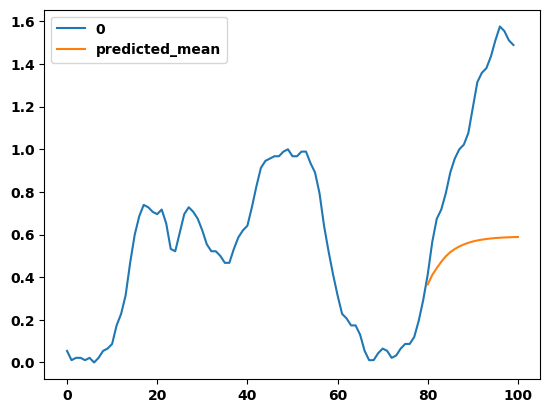

In [42]:
y_h = model2.predict(start=80, end=100, dynamic=False).to_frame()

ax = pd.DataFrame(scaler.transform(data)).plot(legend=True)

y_h.plot(ax=ax)

#### Estudiante 2: Ricardo Damián Hernández Ramírez

### Respuesta planteada en el ejercicio 2 usando (markdown)

La respuesta es un modelo ARIMA con parámetros:

- $p=3$
- $d=1$
- $q=0$

### Ejercicio 3: Investigar la implementación y teoría de los modelos SARIMAX. Además de eso, generar un modelo de pronóstico usando SARIMAX, donde todo el procediemiento anteriormente descrito es implementado, para el siguiente conjunto de datos con estacionalidad:

```
air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))
data2.index = pd.date_range(start=datetime(data2.time[0], 1, 1), periods=len(data2), freq='MS')
```
**Nota**: Pueden basarse en el siguiente enlace para entender el análisis a realizar 
https://analyticsindiamag.com/complete-guide-to-sarimax-in-python-for-time-series-modeling/

#### Estudiante 1: Judith Alejandra Hinojosa Rábago

In [27]:
import requests
from datetime import datetime

air2 = requests.get('https://www.stata-press.com/data/r12/air2.dta').content
data2 = pd.read_stata(BytesIO(air2))
data2.index = pd.date_range(start=datetime(data2.time[0], 1, 1), periods=len(data2), freq='MS')
data2.drop(columns=['time', 't'], inplace=True)
data2.head()

,air
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [28]:
split_train = int(data2.shape[0] * 0.8)
train2 = data2[:split_train]
test2 = data2[split_train:]

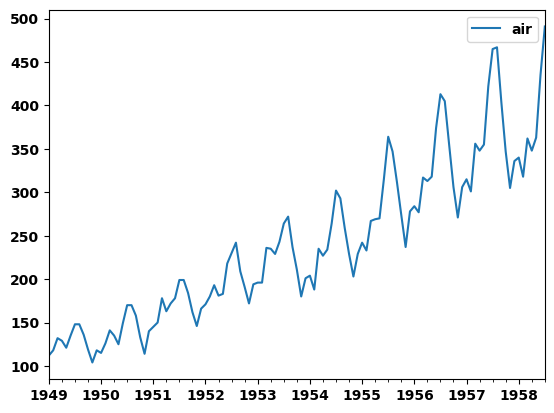

In [29]:
train2.plot()
plt.show()

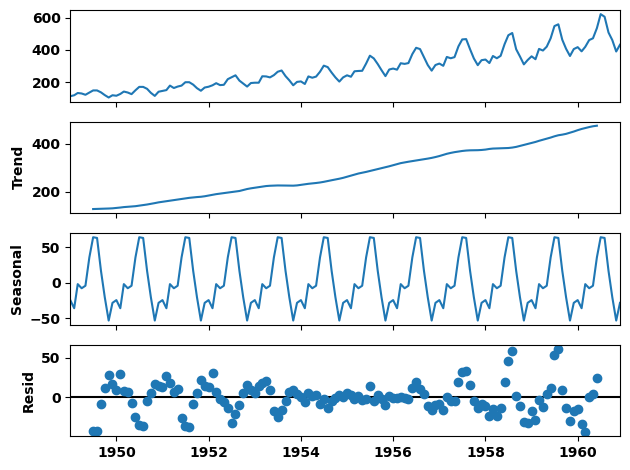

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_data = seasonal_decompose(data2, model="additive")
decompose_data.plot()
plt.show()

In [31]:
adf_test(train2)

Results of Dickey-Fuller Test:
Test Statistic                  -0.356889
p-value                          0.917052
#Lags Used                      13.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64
Non-stationary


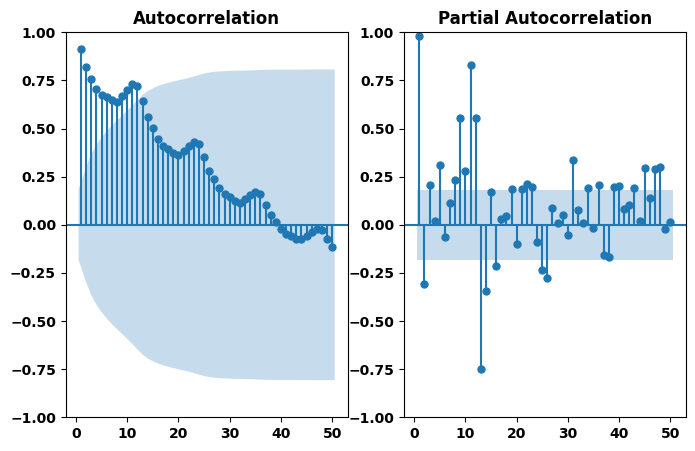

In [32]:
plot_acf_pacf(train2, {'lags':50})

In [33]:
# Diferenciación estacional de la serie train
diff12 = train2.diff(periods=12).dropna()

print('ADF para derivada estacional...\n')
adf_test(diff12) # Probar estacionariedad

diff12_1 = train2.diff(periods=12).diff().dropna()

print('ADF para derivada sobre la derivada estacional...\n')
adf_test(diff12_1) # Probar estacionariedad

ADF para derivada estacional...

Results of Dickey-Fuller Test:
Test Statistic                  -3.338803
p-value                          0.013231
#Lags Used                       2.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64
Stationary
ADF para derivada sobre la derivada estacional...

Results of Dickey-Fuller Test:
Test Statistic                -1.217627e+01
p-value                        1.383981e-22
#Lags Used                     0.000000e+00
Number of Observations Used    1.010000e+02
Critical Value (1%)           -3.496818e+00
Critical Value (5%)           -2.890611e+00
Critical Value (10%)          -2.582277e+00
dtype: float64
Stationary


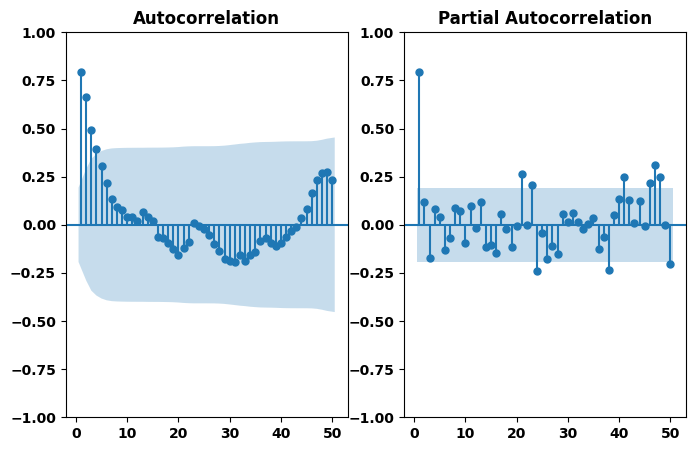

In [34]:
plot_acf_pacf(diff12, {'lags':50})

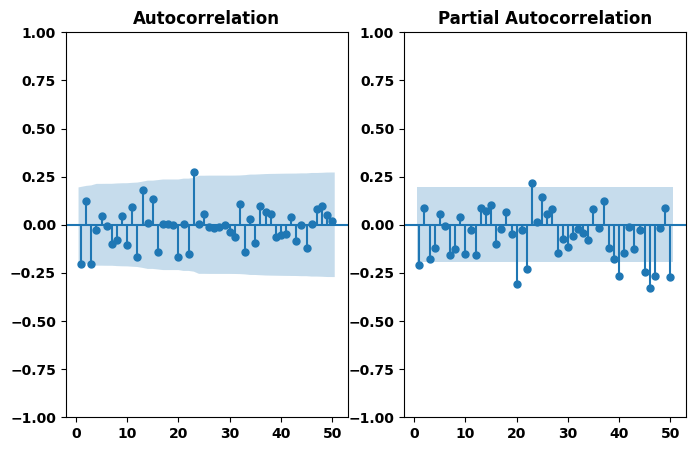

In [35]:
plot_acf_pacf(diff12_1, {'lags':50})

In [36]:
# 1. Modelo de diferencia de primer orden (p=0, d=1, q=0) S = 12
arima_model1 = ARIMA(diff12, order=(0, 1, 0))
model1 = arima_model1.fit()
print(model1.summary())

                               SARIMAX Results                                
Dep. Variable:                    air   No. Observations:                  103
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -377.913
Date:                Tue, 06 Feb 2024   AIC                            757.826
Time:                        00:37:39   BIC                            760.451
Sample:                    01-01-1950   HQIC                           758.889
                         - 07-01-1958                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        96.7550     13.829      6.997      0.000      69.652     123.858
Ljung-Box (L1) (Q):                   4.33   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.04   Pr

In [37]:
import statsmodels.api as sm
model=sm.tsa.statespace.SARIMAX(train2,order=(0, 1, 0),seasonal_order=(0,1,0,12))
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                air   No. Observations:                  115
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                -377.913
Date:                            Tue, 06 Feb 2024   AIC                            757.826
Time:                                    00:37:39   BIC                            760.451
Sample:                                01-01-1949   HQIC                           758.889
                                     - 07-01-1958                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        96.7569     13.829      6.997      0.000      69.652     123.861
===================================================================================
Ljung-Box (L1) (Q):                   4.33   Jarque-Bera (JB):                 1.72
Prob(Q):                              0.04   Prob(JB):                         0.42
Heteroskedasticity (H):               0.80   Skew:                             0.31
Prob(H) (two-sided):                  0.51   Kurtosis:                         2.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
data2['pred'] = pd.DataFrame(results.predict(start=115,end=144,dynamic=True))

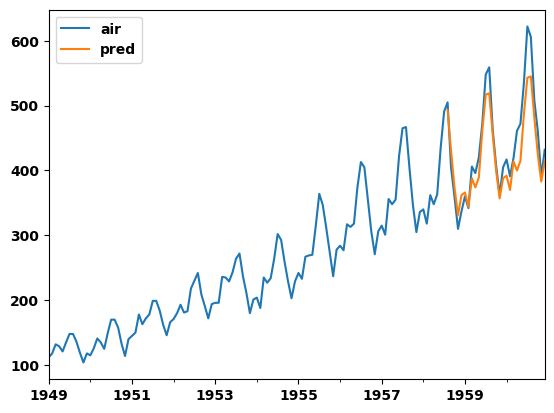

In [39]:
data2[['air', 'pred']].plot()
plt.show()

#### Estudiante 2: Ricardo Damián Hernández Ramírez

### Respuesta planteada en el ejercicio 3 usando (markdown)
 La respuesta es .........

### Ejercicio 4: Realizar una predicción de 20 unidades de tiempo en el futuro, tanto para el modelo ARIMA como SARIMA y reportar los resulados en una gráfica donde se puedan observar los datos reales y los datos predicho.

#### Estudiante 1: Judith Alejandra Hinojosa Rábago

<Axes: >

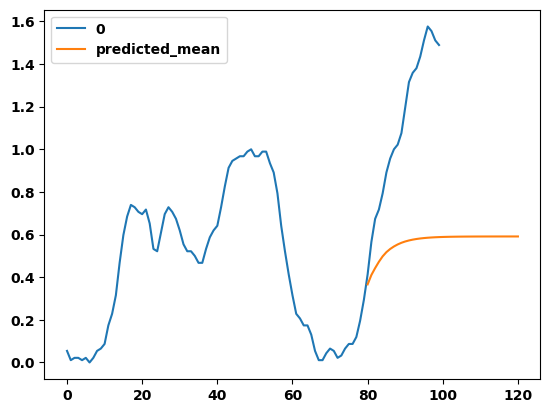

In [40]:
y_h = model2.predict(start=80, end=120, dynamic=True).to_frame()

ax = pd.DataFrame(scaler.transform(data)).plot(legend=True)

y_h.plot(ax=ax)

<Axes: >

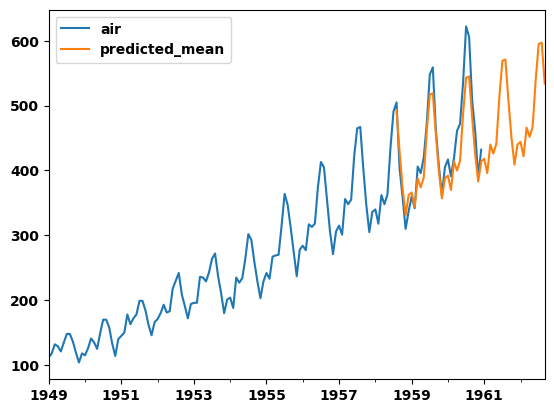

In [41]:
y_h = pd.DataFrame(results.predict(start=115,end=164,dynamic=True))
ax = data2['air'].plot(legend=True)
y_h.plot(ax=ax)

#### Estudiante 2: Ricardo Damián Hernández Ramírez

### Respuesta planteada en el ejercicio 4 usando (markdown)
 La respuesta es .........